# Procesamiento de Imágenes

OpenCV es una biblioteca libre de visión artificial originalmente desarrollada por Intel. Se ha utilizado en infinidad de aplicaciones. Desde sistemas de seguridad con detección de movimiento, hasta aplicaciones de control de procesos donde se requiere reconocimiento de objetos. 

Open CV es multiplataforma, existiendo versiones para GNU/Linux, Mac OS X y Windows. Contiene más de 500 funciones que abarcan una gran gama de áreas en el proceso de visión, como reconocimiento de objetos (reconocimiento facial), calibración de cámaras, visión estérea y visión robótica.



Vamos utilizar Procesamiento de Imágenes y algoritmos de visión

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


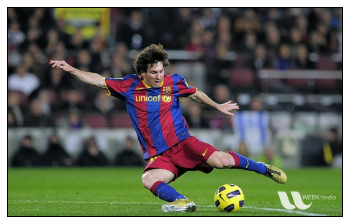

In [2]:
%pylab inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = plt.imread('messi5.jpg') #1,0,-1
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imsave('messigray.png',img)
plt.show()


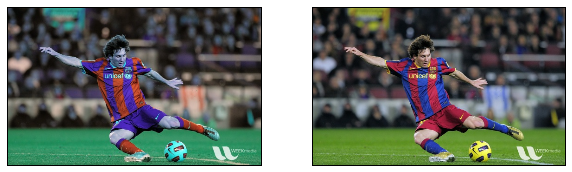

In [2]:
img = cv2.imread('messi5.jpg')
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img)# expects distorted color
plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(img2) # expect true color
plt.xticks([]), plt.yticks([])
plt.show()

# Image 

Una región de interés (ROI a menudo abreviado), es un subconjunto seleccionado de muestras dentro de un conjunto de datos identificado para un propósito particular

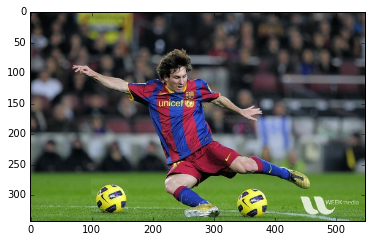

In [3]:
ball = img2[280:340, 330:390]
img2[273:333, 100:160] = ball
plt.imshow(img2)
plt.show()

## Mezcla de imagen

Se puede adicionar dos imagenes con diferentes pesos, las imágenes da una sensación de fusión o la transparencia. Las imágenes se añaden como  la siguiente ecuación:

$$g (x) = (1 - \alpha) f_ {0} (x) + \alpha f_ {1} (x)$$

Variando $\alpha$ de $0 \rightarrow 1$, puede realizarse una transición  entre una imagen a otra.

Aquí se toman dos imágenes para que se mezclen entre sí. La primera imagen se le da un peso de 0,7 y segunda imagen se le da 0.3. La función cv2.addWeighted()  aplica la siguiente ecuación en las imagenes.

$$dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma$$

Aquí $\gamma $se toma como cero.

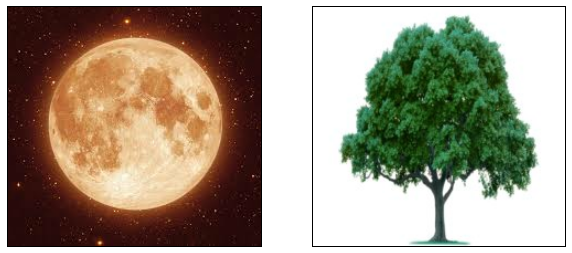

In [4]:
img1 = cv2.imread('luna.jpg')
img2 = cv2.imread('tree.jpg')

plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img1)
plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(img2) 
plt.xticks([]), plt.yticks([])
plt.show()

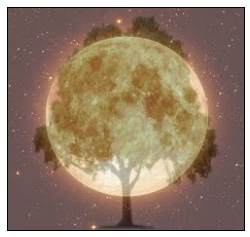

In [5]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

## Cómo medir el rendimiento en IPython

A veces puede que tenga que comparar el rendimiento de dos operaciones similares. IPython esta el comando %timeit  para realizar esto. 

Por ejemplo, ¿sabe cuál de las siguientes operaciones es más mejor?.

In [6]:
x = 5

In [7]:
%timeit y=x**2

The slowest run took 75.48 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 79 ns per loop


In [8]:
%timeit y=x*x

The slowest run took 26.01 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 82.5 ns per loop


In [9]:
z = np.uint8([5])

In [10]:
%timeit y=z*z


The slowest run took 39.50 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 785 ns per loop


In [11]:
 %timeit y=np.square(z)

The slowest run took 37.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 827 ns per loop


In [12]:
# comparando opencv con np
img1 = cv2.imread('luna.jpg',0)
%timeit np.count_nonzero(img1)

10000 loops, best of 3: 163 µs per loop


In [13]:
# debe ser con una imagen en escala de grises
%timeit cv2.countNonZero(img1)

10000 loops, best of 3: 69.9 µs per loop


## Cambio color imagenes



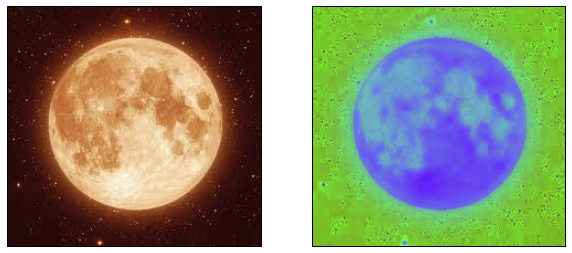

In [14]:
#cv2.cvtColor(input_image, flag)
img1 = cv2.imread('luna.jpg')
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img1)
plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(hsv) 
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print flags

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652R

## Image Thresholding

Si el valor de pixel es mayor que un valor umbral, se le asigna un valor (puede ser de color blanco), de lo contrario se le asigna otro valor (puede ser de color negro). La función utilizada es cv2.threshold. El primer argumento es la imagen de origen, que debe ser una imagen de escala de grises. Segundo argumento es el valor umbral que se utiliza para clasificar los valores de los píxeles. En tercer argumento es el Maxval que representa el valor que debe darse si el valor de pixel es más que (a veces menos) el valor de umbral. OpenCV proporciona diferentes estilos de umbral y se decide por el cuarto parámetro de la función. Los diferentes tipos son:

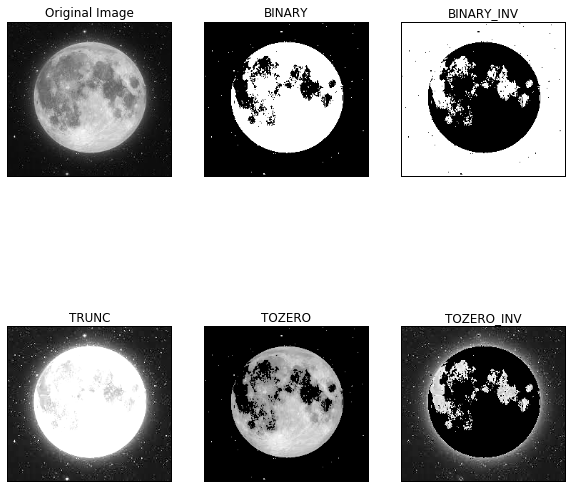

In [16]:
img = cv2.imread('luna.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(10,10))
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

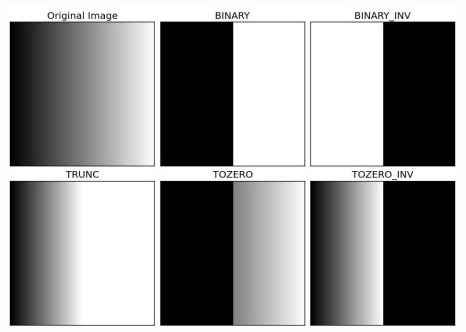

In [17]:
from IPython.display import Image
Image(filename='ejemplo.png')

Se utilizó un valor global como valor umbral. Pero puede no ser bueno en todas las condiciones donde la imagen tiene diferentes condiciones de iluminación en las diferentes áreas. En ese caso, es mejor un umbral adaptativo. En este caso el algoritmo de calcula el umbral para pequeñas regiones de la imagen. Por lo que tenemos diferentes umbrales para las diferentes regiones de la misma imagen y nos da mejores resultados para las imágenes con mayor o menor iluminación.

Cuenta con tres parametros de entrada "especiales" y sólo un argumento de salida.

Método adaptativo - Se decide cómo se calcula el valor de umbral.

cv2.ADAPTIVE_THRESH_MEAN_C: valor umbral es la media de la zona de alrededor
cv2.ADAPTIVE_THRESH_GAUSSIAN_C: valor umbral es la suma ponderada de los valores de alrededor, donde los pesos son una ventana gaussiana.

Tamaño de bloque - Se decide el tamaño de la zona de vecindad.

C - Es simplemente una constante que se resta de la media o media ponderada calculada.

A continuación trozo de código compara umbralización global y umbral adaptativo para una imagen con iluminación variable:

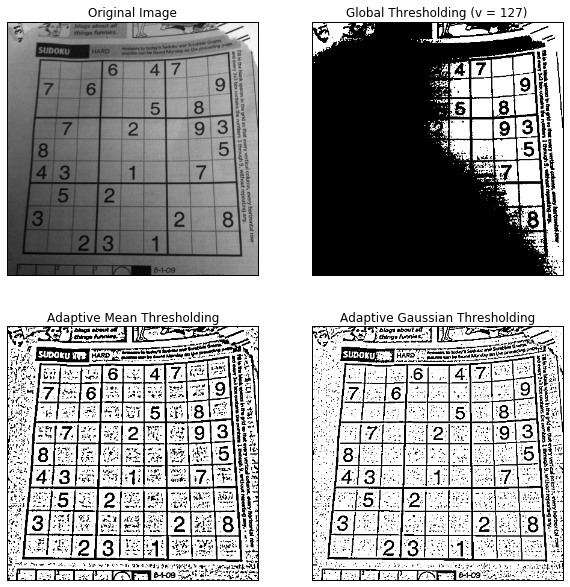

In [18]:
img = cv2.imread('sudoku.jpg',0)


ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(10,10))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Binarización Otsu

En umbralización global, hemos utilizado un valor arbitrario para el umbral, ¿verdad? Así que, ¿cómo podemos saber un valor seleccionamos es bueno o no? La respuesta es, método de ensayo y error. Pero considere una imagen bimodal (En palabras sencillas, la imagen bimodal es una imagen cuyo histograma tiene dos picos). Por esa imagen, podemos tomar un valor aproximadamente en la mitad de esos picos como valor umbral, ¿verdad? Eso es lo que hace Otsu binarización. Así pues, en palabras sencillas, se calcula automáticamente un valor umbral a partir del histograma de una imagen bimodal. (Para las imágenes que no son bimodal, la binarización no será exacta.)

Para ello, se utiliza la función de nuestra cv2.threshold (), pero pasa una bandera adicional, cv2.THRESH_OTSU. Para el valor de umbral, simplemente pasa el cero. A continuación, el algoritmo encuentra el valor umbral óptimo y se vuelve como la segunda salida, RetVal. Si no se utiliza Otsu umbral, RetVal es igual que el valor de umbral que utilizó.



120.0
95.0
94.0


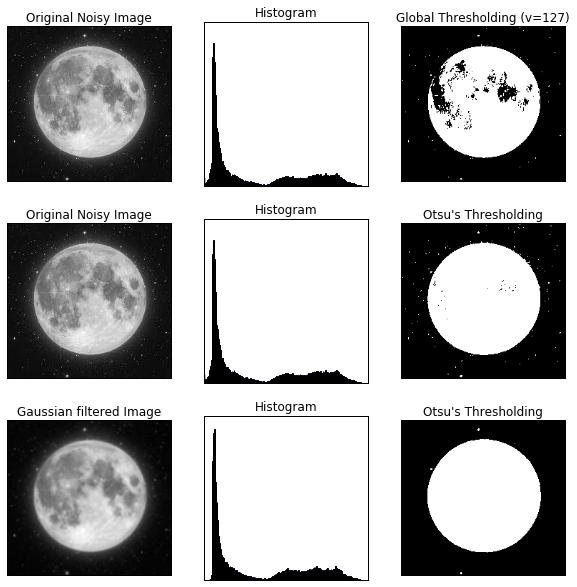

In [19]:
img = cv2.imread('luna.jpg',0)


# global thresholding
ret1,th1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
print ret1
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print ret2
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print ret3
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(10,10))
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

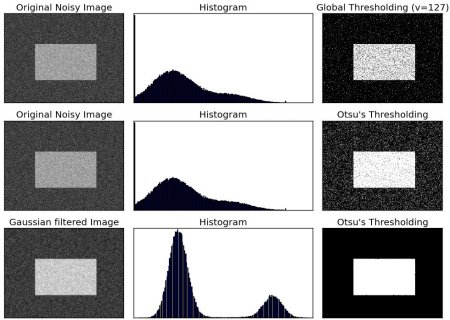

In [20]:
Image(filename='otsu.jpg')

## Tranformaciones

Diferentes transformaciones geométricas de imágenes como la traslación, rotación, transformación afín etc.

### Escala

El escalado es sólo modificar el tamaño de la imagen. OpenCV viene con un función  cv2.resize() para este propósito. El tamaño de la imagen se puede especificar manualmente, o puede especificar el factor de escala. Se utilizan diferentes métodos de interpolación. métodos de interpolación son preferibles cv2.INTER_AREA de contracción y cv2.INTER_CUBIC (lento) y cv2.INTER_LINEAR para el zoom. Puede cambiar el tamaño de una imagen de entrada cualquiera de los métodos siguientes:

In [21]:
img = cv2.imread('messi5.jpg')
print shape(img)

res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
print shape(res1)
#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

(342, 548, 3)
(684, 1096, 3)


### Translación

La translación es el cambio de ubicación del objeto. Si conoce el cambio en la dirección $(x,y)$, $(t_x, t_y)$, se puede crear la matriz de transformación $\textbf{H}$ de la siguiente manera:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$



In [22]:
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))



### Rotación

La rotación de una imagen para un ángulo $\theta$ se logra mediante la matriz de transformación de la forma

$$M = \begin {bmatrix} \cos \theta & - \sin \theta \\ \sin \theta & cos \theta \end{bmatrix}$$

Pero OpenCV proporciona una rotación escalada con el centro de rotación ajustable de manera que puede girar en cualquier lugar que usted prefiera. La matriz de transformación de modificación está dada por

$$\begin{bmatrix} \alpha & \beta & (1- \alpha) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha) \cdot center.y \end{bmatrix}$$

Donde:

$$\begin {array} {l} \alpha = escala \cdot \cos \theta, \\ \beta = escala \cdot \sin \theta \end{array}$$

Para encontrar esta matriz de transformación, OpenCV proporciona una función, cv2.getRotationMatrix2D. 

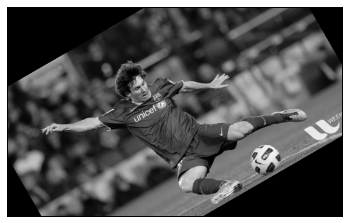

In [23]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1) #centro, angulo, escala
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Transformacion afin

En la transformación afín, todas las líneas paralelas en la imagen original todavía serán paralelas la imagen de salida. Para encontrar la matriz de transformación, necesitamos tres puntos de imagen de entrada desde y sus correspondientes ubicaciones en la imagen de salida. Entonces cv2.getAffineTransform creará una matriz de 2x3 que ha de ser pasado a cv2.warpAffine.

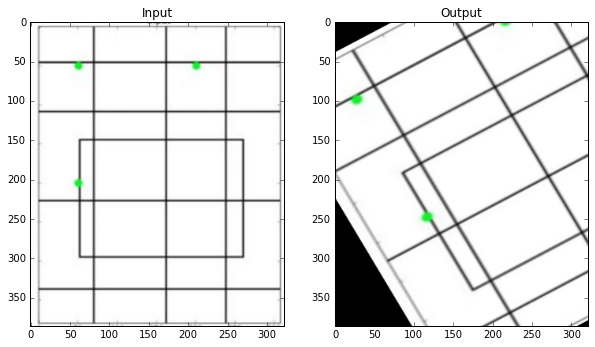

In [24]:
img = cv2.imread('rejilla.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,0],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Transformación de perspectiva

Para la transformación de perspectiva, se necesita una matriz de transformación 3x3. Las líneas rectas se mantendrá recta, incluso después de la transformación. Para encontrar esta matriz de transformación, que necesita 4 puntos de la imagen de entrada y los puntos correspondientes en la imagen de salida en. Entre estos 4 puntos, 3 de ellos no debería ser colineales. Entonces matriz de transformación se puede encontrar por el cv2.getPerspectiveTransform función. A continuación, aplicar cv2.warpPerspective con esta matriz de transformación 3x3.

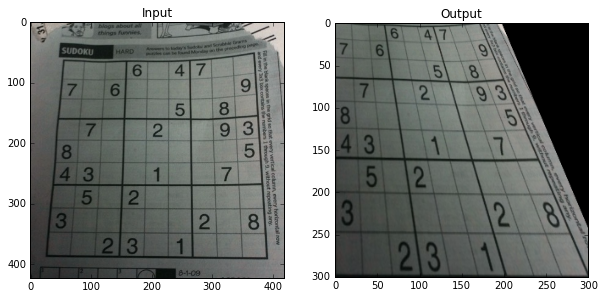

In [25]:
img = cv2.imread('sudoku.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[170,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Suavizando Imágenes

### La convolución 2D (Filtrado de imágenes)

En cuanto a las señales unidimensionales, las imágenes también se pueden filtrar con varios filtros de paso bajo (LPF), filtros de paso alto (HPF), etc. Un LPF ayuda en la eliminación de ruido o desenfoque de la imagen. A filtros HPF ayuda en la búsqueda de los bordes de una imagen.

OpenCV proporciona una función, cv2.filter2D (), convoluciona un núcleo con una imagen. A modo de ejemplo, vamos a probar un filtro de promedio en una imagen. Un núcleo de filtro 5x5 de promedio se puede definir como sigue:

$$K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$

Filtrado con los resultados anteriores del kernel en la siguiente se realiza: para cada píxel, una ventana de 5x5 se centra en este píxel, todos los píxeles que caen dentro de esta ventana se suman, y el resultado se divide por 25. Esto equivale a calcular el promedio de los valores de los píxeles dentro de esa ventana. Esta operación se realiza para todos los píxeles de la imagen para producir la imagen de salida filtrada. 

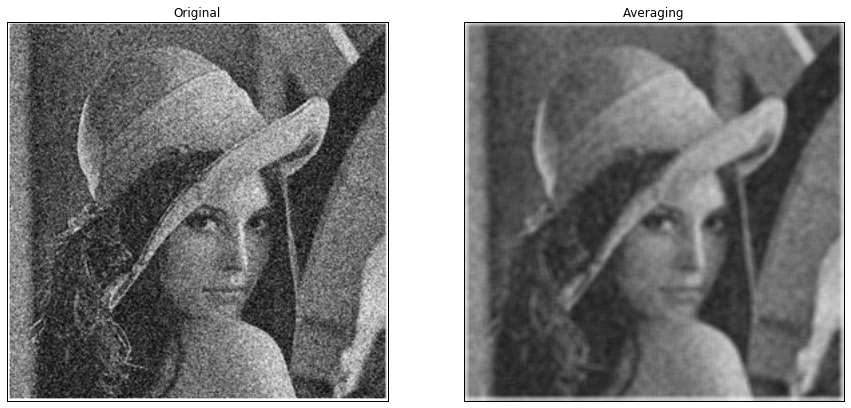

In [26]:
img = cv2.imread('ruido.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel) 

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Desenfoque de la imagen (Suavizado de imagen)

Borrosidad de la imagen se logra mediante la convolución de la imagen con un filtro de núcleo de paso bajo. Es útil para eliminar el ruido. En realidad, elimina el contenido de alta frecuencia (por ejemplo: ruido, bordes) de la imagen y logra bordes borrosos cuando se trata de aplicar el filtro. (Bueno, hay técnicas que no enturbian bordes visión borrosa). OpenCV proporciona principalmente cuatro tipos de técnicas de desenfoque.

### 1. Promediar

Esto se hace mediante la convolución de la imagen con un filtro de caja normalizada. Simplemente toma el promedio de todos los píxeles en virtud de área del núcleo y reemplaza el elemento central con este promedio. Esto se hace con la función cv2.blur() o cv2.boxFilter (). Compruebe la documentación para más detalles sobre el núcleo. Debemos especificar el ancho y la altura del núcleo. Un filtro de caja 3x3 normalizado se vería así:

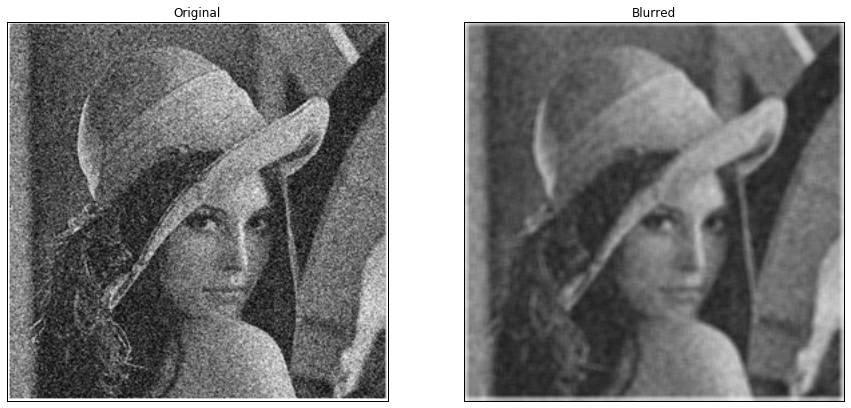

In [27]:
img = cv2.imread('ruido.png')

blur = cv2.blur(img,(5,5))

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Filtrado de Gauss

En lugar de un filtro de caja que consiste de coeficientes de filtro iguales, se utiliza un kernel de Gauss cuyos coeficientes siguen una distribución Gaussiana. Se realiza con la función, cv2.GaussianBlur(). Debemos especificar el ancho y la altura del kernel que debería ser positivo e impar. También hay que especificar la desviación estándar en las direcciones X e Y, y Sigmax sigmaY respectivamente. Si sólo se especifica Sigmax, sigmaY se toma como igual a Sigmax. Si tanto se dan como ceros, que se calculan a partir del tamaño del núcleo. filtrado gaussiano es altamente eficaz en la eliminación de ruido gaussiano de la imagen.

Si lo desea, puede crearse un núcleo de Gauss con la función, cv2.getGaussianKernel().

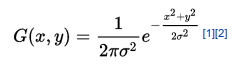

In [28]:
Image(filename='gauss.png')

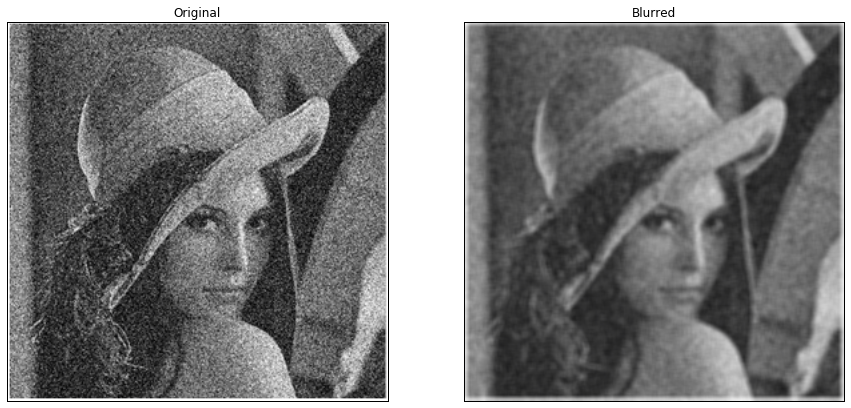

In [29]:
img = cv2.imread('ruido.png')
blur = cv2.GaussianBlur(img,(5,5),3,3)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Median Blur


Aquí, la función cv2.medianBlur () calcula la mediana de todos los píxeles debajo de la ventana del núcleo y el píxel central se sustituye con este valor de la mediana. Esto es altamente eficaz en la eliminación de ruido de sal y pimienta. Una cosa interesante a destacar es que, en los filtros de Gauss y la caja, el valor filtrado para el elemento central puede ser un valor que puede no existir en la imagen original. Sin embargo, este no es el caso en el filtrado de mediana, ya que el elemento central siempre se sustituye por un valor de píxel en la imagen. Esto reduce el ruido de manera efectiva. El tamaño del grano debe ser un entero impar positivo.


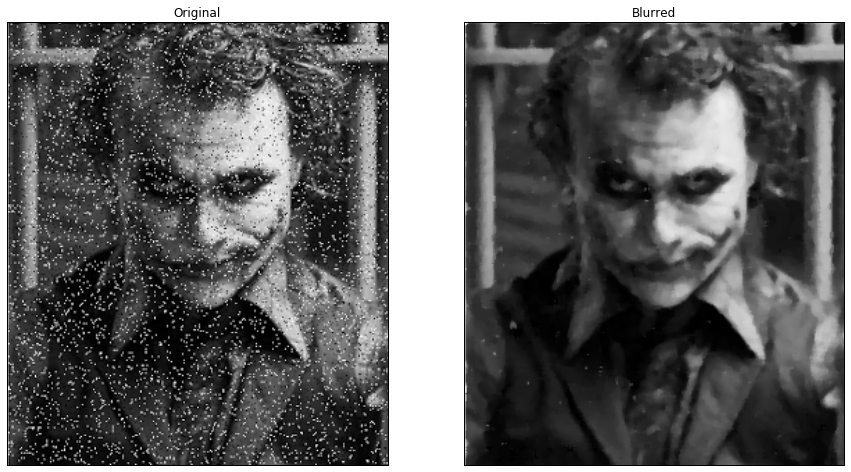

In [30]:
img = cv2.imread('pimienta.png')
blur = cv2.medianBlur(img,5)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 4. Filtro bilateral

Como hemos señalado, los filtros que hemos presentado anteriormente tienden a difuminar los bordes. Este no es el caso para el filtro bilateral, cv2.bilateralFilter (), que se definió para, y es muy efectivo en la eliminación de ruido, preservando bordes. Pero la operación es más lenta en comparación con otros filtros. Ya vimos que un filtro de Gauss toma  alrededor del píxel y encuentra su media ponderada de Gauss. Este filtro de Gauss es una función del espacio por sí sola, es decir, los píxeles cercanos se consideran. No tener en cuenta si los píxeles tienen casi el mismo valor de intensidad y no tiene en cuenta si el píxel se encuentra en un borde o no. El efecto resultante es que los filtros gaussianos tienden a difuminar los bordes, lo cual es indeseable.

El filtro bilateral también utiliza un filtro de Gauss en el dominio espacial, pero también utiliza una función de las diferencias de intensidad de pixel. La función gaussiana de espacio se asegura de que sólo los píxeles son 'vecinos espaciales' se consideran para el filtrado, mientras que el componente gaussiano aplicado en el dominio de intensidad (una función gaussiana de las diferencias de intensidad) asegura que sólo los pixeles con intensidades similares a la de la central de pixel ( "vecinos intensidad ') se incluyen para calcular el valor de intensidad borrosa. Como resultado, este método conserva bordes.

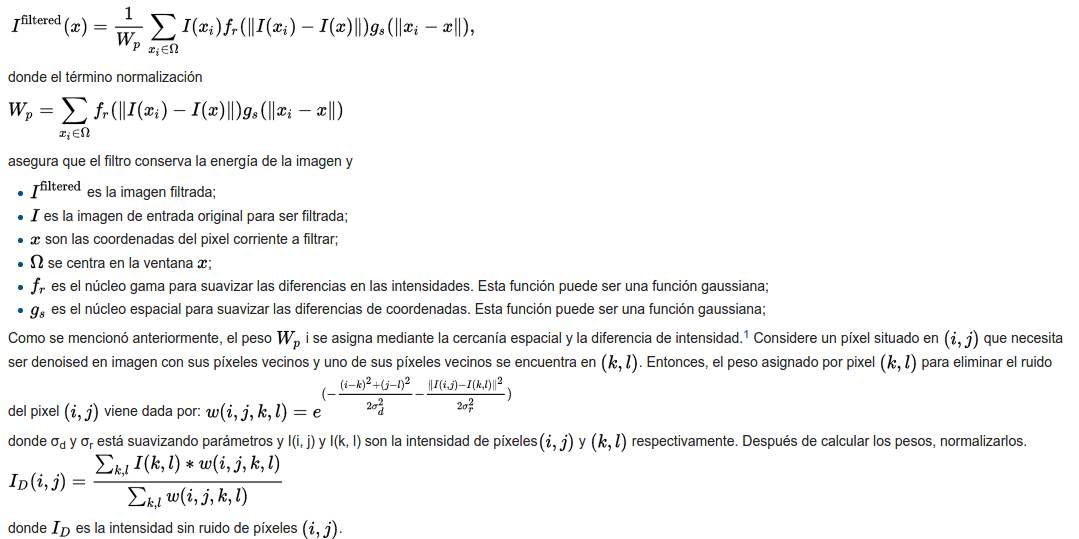

In [31]:
Image(filename='bilaterl.png')

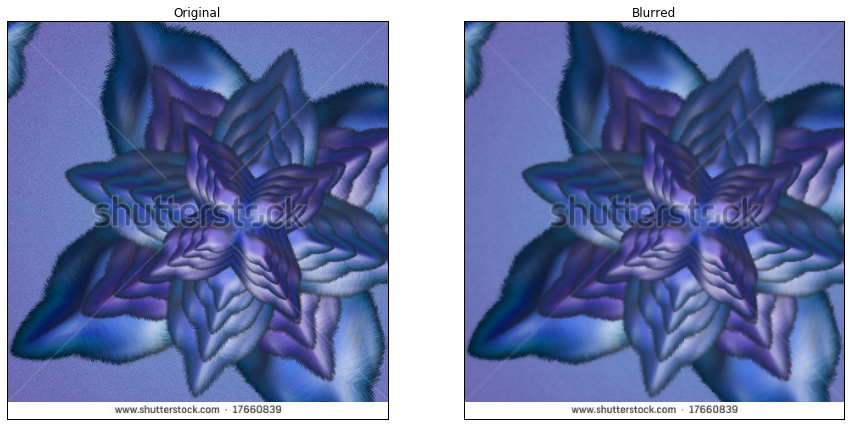

In [32]:
img = cv2.imread('flor.jpg')
blur = cv2.bilateralFilter(img,5,75,75)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

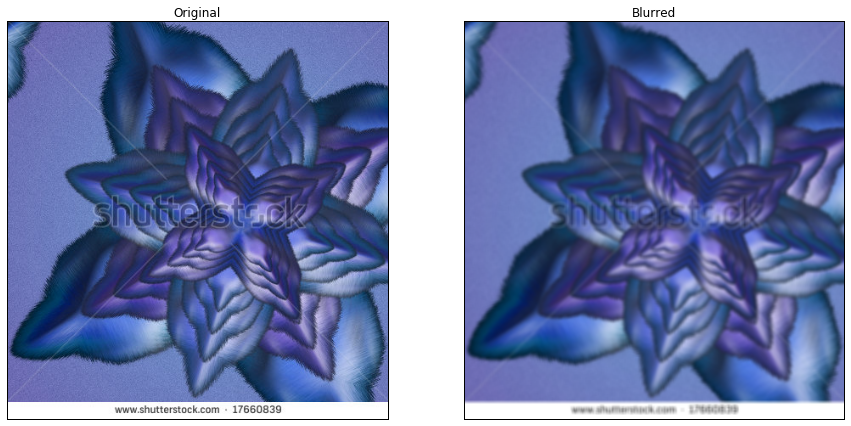

In [33]:
img = cv2.imread('flor.jpg')
blur = cv2.GaussianBlur(img,(5,5),3,3)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Las transformaciones morfológicas

Las transformaciones morfológicas son algunas operaciones sencillas basadas en la forma de la imagen. Se lleva a cabo normalmente en las imágenes binarias.  Dos operadores morfológicos básicos son la erosión y la dilatación. A continuación, sus formas variantes como la apertura, cierre, Gradiente etc 

### 1. Erosión
La idea básica de la erosión es igual que la erosión del suelo solamente, que erosiona los límites del objeto en primer plano (siempre trato de mantener en primer plano en blanco). Entonces ¿Qué es lo que hace? El núcleo se desliza a través de la imagen (como en la convolución 2D). Un píxel en la imagen original (1 o 0) 1 serán considerados sólo si todos los píxeles bajo el kernel es 1, de lo contrario se erosiona (se hace cero).

Entonces, todos los píxeles cerca de límite se descartarán dependiendo del tamaño de kernel. Así que el grosor o el tamaño del objeto en primer plano disminuye o región simplemente blanco disminuye en la imagen. Es útil para eliminar ruidos blancos pequeños, separar dos objetos conectados etc.

In [36]:
img = cv2.imread('bolas.jpg',0)
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)

In [53]:
erosion = cv2.erode(img,kernel,iterations = 4)

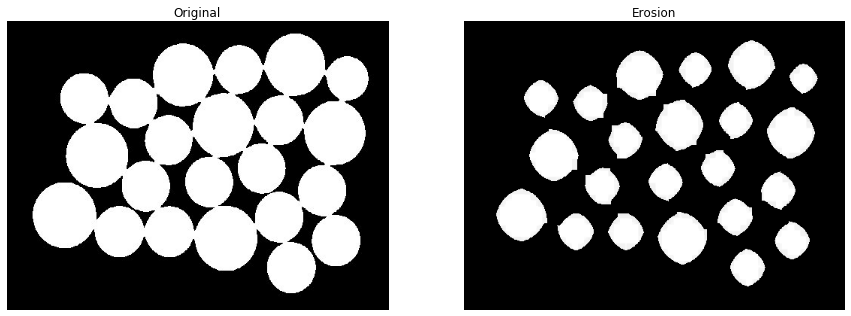

In [54]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap="gray"),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Dilatación

Es justo lo opuesto de la erosión. Aquí, un elemento de la imagen es '1' si al menos un píxel bajo el kernel es '1'. Por lo tanto, aumenta la región de blanco en la imagen o el tamaño de los aumentos de objeto en primer plano. Normalmente, en casos como la eliminación de ruido, la erosión es seguido por la dilatación. Debido a que, la erosión elimina ruidos blancos además de reducir nuestro objeto. También es útil en unirse a partes rotas de un objeto

In [63]:
dilation = cv2.dilate(erosion,kernel,iterations = 2)

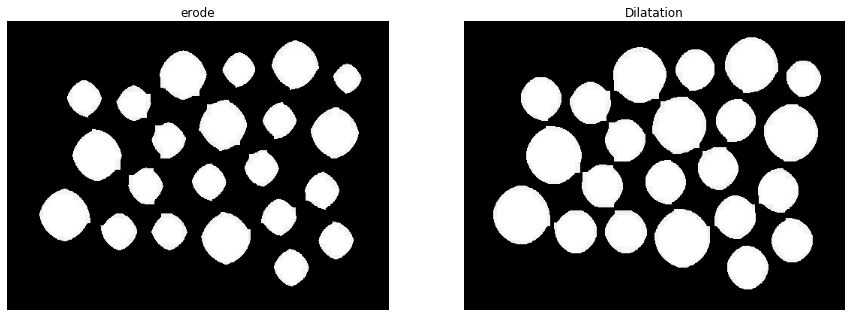

In [64]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(erosion,cmap="gray"),plt.title('erode')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap="gray"),plt.title('Dilatation')
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Apertura

Apertura es sólo otro nombre de una erosión seguida de una dilatación. Es útil en la eliminación de ruido, como hemos explicado anteriormente. Aquí se utiliza la función, cv2.morphologyEx ()

In [68]:
img = cv2.imread('bolas2.png',0)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

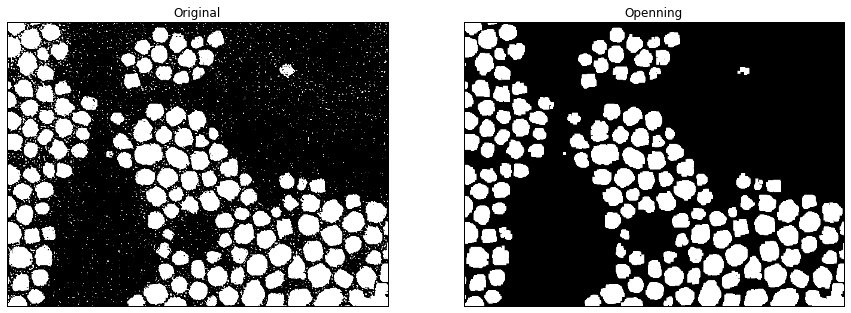

In [69]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap="gray"),plt.title('Openning')
plt.xticks([]), plt.yticks([])
plt.show()

### 4. Cierre

El cierre es inverso a la de apertura, seguido de la dilatación  se realiza una erosión. Es útil en el cierre de agujeros pequeños en el interior de los objetos en primer plano, o pequeños puntos negros en el objeto.

In [76]:
img = cv2.imread('close.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

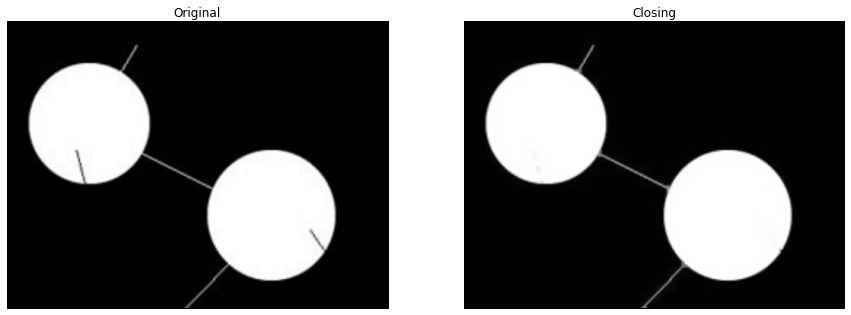

In [77]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap="gray"),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

### 5. Gradiente morfológico

El gradiente morfológico es la diferencia entre la dilatación y la erosión de la imagen. Por lo tanto, usted tiene tres operaciones básicas que se utilizan.

Este gradiente se utiliza para encontrar los límites o bordes de una imagen. Usted debe aplicar algún tipo de filtrado antes de calcular la pendiente, ya que es muy sensible al ruido.

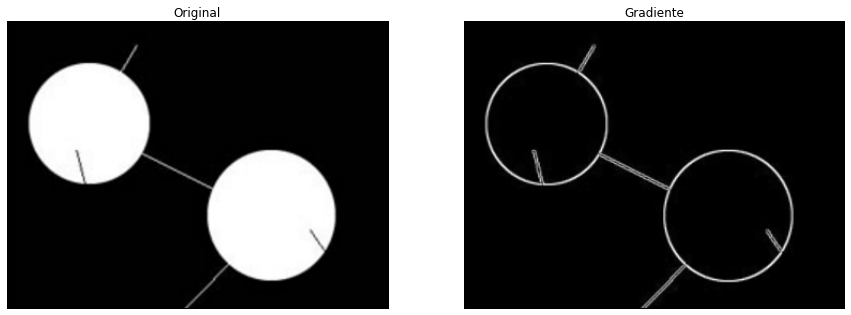

In [80]:
img = cv2.imread('close.png',0)
kernel = np.ones((2,2),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap="gray"),plt.title('Gradiente')
plt.xticks([]), plt.yticks([])
plt.show()

### 6. Top Hat

Es la diferencia de la imagen original y la apertura de la imagen. En él se destacan las vías estrechas entre las diferentes regiones.

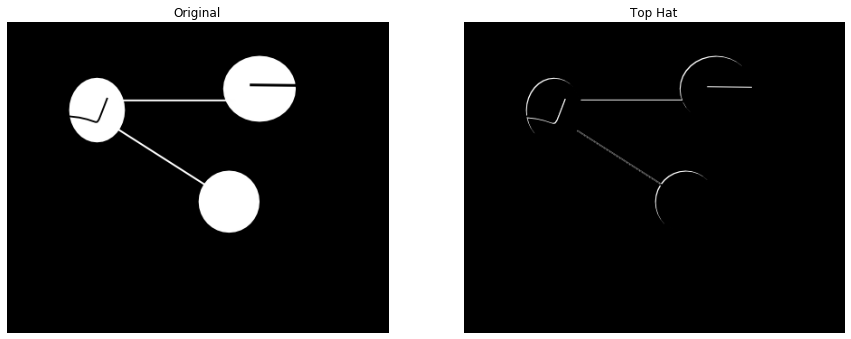

In [86]:
img = cv2.imread('cuadrado.png',0)
kernel = np.ones((2,2),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat,cmap="gray"),plt.title('Top Hat')
plt.xticks([]), plt.yticks([])
plt.show()

### 7. Black Hat

Black Hat es la diferencia entre el cierre de una imagen y la propia imagen. Esto pone de relieve las regiones negras estrechos en la imagen.

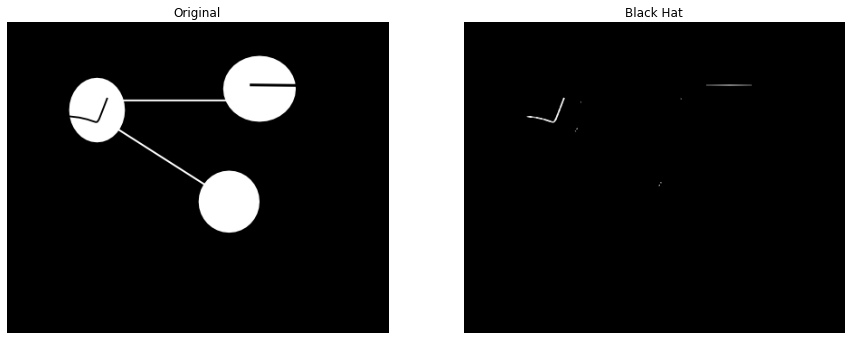

In [87]:
img = cv2.imread('cuadrado.png',0)
kernel = np.ones((3,3),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat,cmap="gray"),plt.title('Black Hat')
plt.xticks([]), plt.yticks([])
plt.show()

### 8. Elemento estructurante

Se puede crear manualmente una serie de elementos estructurantes ayuda de Numpy.. Sin embargo, en algunos casos, es posible helnel con forma elíptica / circulares. Así que para este fin, tiene una función de OpenCV, cv2.getStructuringElement (). Usted sólo tiene que pasar la forma y el tamaño del kernel

In [3]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [4]:
# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [9]:
#Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

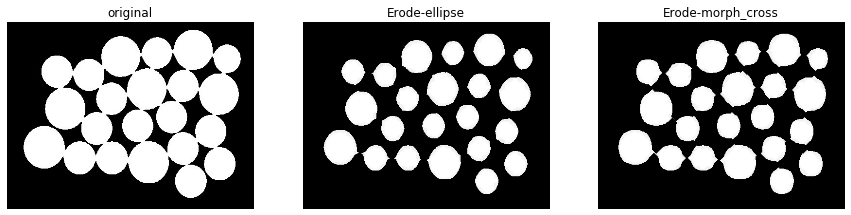

In [7]:
img = cv2.imread('bolas.jpg',0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel2=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
erosion = cv2.erode(img,kernel,iterations = 4)
erosion2=cv2.erode(img,kernel2,iterations = 4)
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(img,cmap="gray"),plt.title('original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion,cmap="gray"),plt.title('Erode-ellipse')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(erosion2,cmap="gray"),plt.title('Erode-morph_cross')
plt.xticks([]), plt.yticks([])
plt.show()